In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/tt_data_for_ml.csv")
data = data.dropna()

def TimetoCongested(x):
    if 730 <= x <= 1000: return 1
    elif 1430 <= x <= 1800: return 1
    return 0
     

In [3]:
pred_data = pd.read_csv("../data/tt_pred_for_ml.csv")
pred_data.columns
X_pred = pred_data[['lat_d', 'lon_d', 'lat_o', 'lon_o', 'od_dist', 'congested']]

In [4]:
y = data["t_travtime"]
X = data[['lat_d', 'lon_d', 'lat_o', 'lon_o', 'od_dist', 't_time_start']]
X['Congested'] = X['t_time_start'].apply(TimetoCongested)
X = X.drop(['t_time_start'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

# MSE 435.15 That is pretty cool
# RMSE = 20.86

# Besides: 
# 1. Grid Search to Tune the hyperparameters for the number of the estimators
# 2. out of bag test: test the generalization of the model on the outlier samples.

MSE 510.0289180234483


121093    15.0
41200     40.0
119683    90.0
123897    60.0
58086     60.0
          ... 
82322     20.0
131922    20.0
87941     10.0
2426      50.0
118193    30.0
Name: t_travtime, Length: 28879, dtype: float64


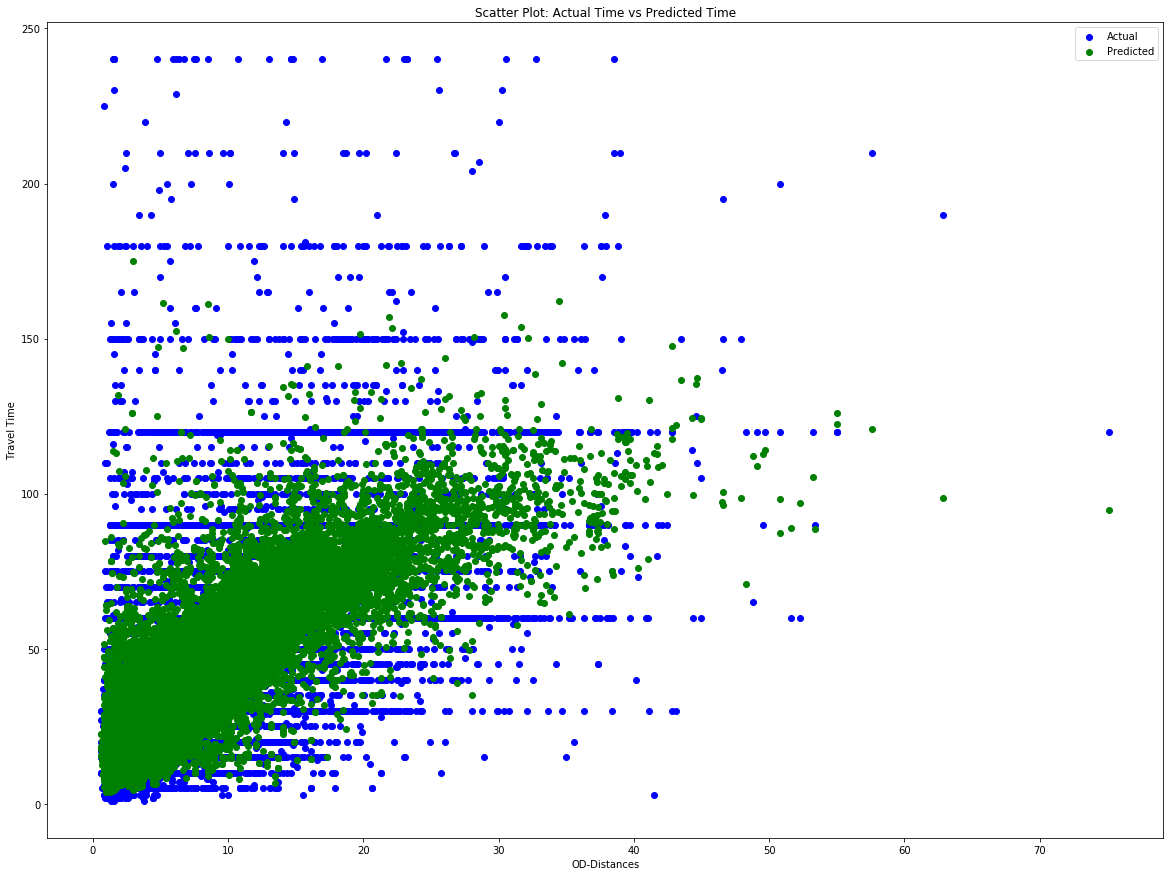

In [6]:
# Visualization

# Small scale figure
# distance,o,d -> T
# 
x = list(range(len(X_test)))

print(y_test)
plt.figure(figsize=(20, 15))
plt.scatter(X_test["od_dist"], y_test, color='blue', label='Actual')  
plt.scatter(X_test["od_dist"], y_pred, color='green', label='Predicted')  
plt.xlabel('OD-Distances')
plt.ylabel('Travel Time')
plt.title('Scatter Plot: Actual Time vs Predicted Time')
plt.legend()
plt.show()

In [7]:
y_pred_layer = rf_regressor.predict(X_pred[:10000])

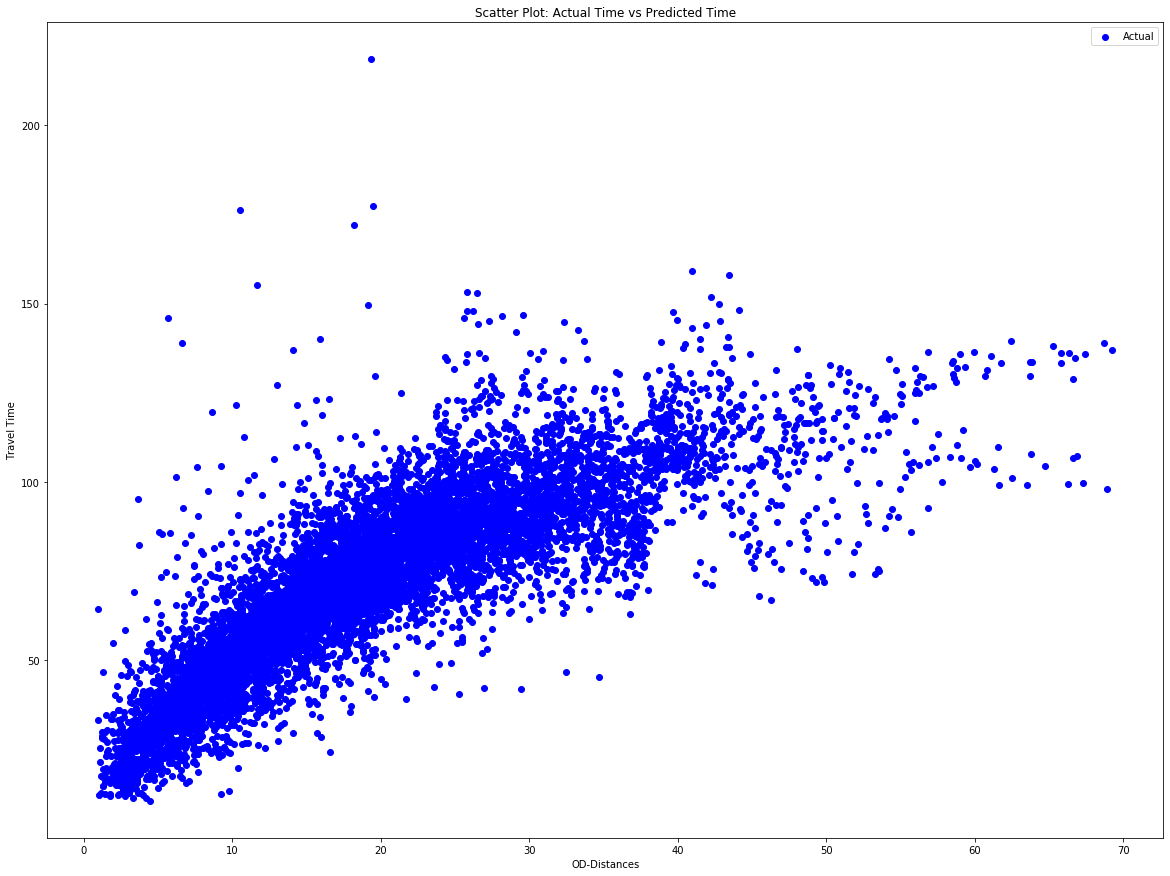

In [8]:
plt.figure(figsize=(20, 15))
plt.scatter(X_pred[:10000]["od_dist"], y_pred_layer, color='blue', label='Actual')   
plt.xlabel('OD-Distances')
plt.ylabel('Travel Time')
plt.title('Scatter Plot: Actual Time vs Predicted Time')
plt.legend()
plt.show()